In [48]:
import pandas as pd


In [49]:
#leitura dos arquivos xls.
df1 = pd.read_excel('Datasets/Aracaju.xlsx')
df2 = pd.read_excel('Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('Datasets/Natal.xlsx')
df4 = pd.read_excel('Datasets/Recife.xlsx')
df5 = pd.read_excel('Datasets/Salvador.xlsx')


In [50]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [51]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [52]:
#pegando uma amostra(aleatoria) do conjunto de dados. sample(qdtDeAmostras)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
89,Recife,2019-01-01,18.11,980,3
98,Salvador,2019-01-01,231.76,1036,3
144,Salvador,2019-01-02,23.38,1034,1
132,Recife,2019-03-02,17.49,983,5
70,Salvador,2019-01-01,39.06,1034,3
166,Natal,2019-01-02,111.72,1035,3
76,Natal,2019-02-20,364.00,853,2
101,Fortaleza,2019-01-01,11.67,1005,4
128,Salvador,2019-03-02,36.84,1034,1
138,Salvador,2019-03-02,212.03,1037,3


In [53]:
#verificando tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [54]:
#alterando o datatype de uma coluna
df['LojaID'] = df['LojaID'].astype('object')

In [55]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [56]:
#consultando valores null
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [57]:
#substituindo os valores nulos pela média(é uma opção...). parametro inplace=True para substituir em memória e poder continuar trabalhando com a alteração. Senão volta para null, apos a execução da linha
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [58]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [59]:
#substituindo os valores nulos por zero(é uma outra opção...)
df['Vendas'].fillna(0, inplace=True)


In [60]:
#Apagando os valores nulos(é uma outra opção...)
df.dropna(inplace=True)

In [61]:
#apagando as linhdas com valores nulos com base apenas e uma coluna(caso tenha mais de uma coluna com valor nulo)
df.dropna(subset=['Vendas'], inplace=True)

In [62]:
#Removendo linhas quem estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

# Criando novas colunas

In [69]:
#criando uma coluna com base em uma operação. Neste caso a multiplicação (mul)
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [70]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [71]:
#criando uma nova coluna, utilizando a operação de divisão (/). 
df['Receita/Vendas'] = df['Receita'] / df['Vendas'] #para obeter a quantidade de produto vendida

In [72]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [73]:
#utilizando função max
df['Receita'].max() #retorna o maior valor da coluna Receita

3544.0

In [74]:
#utilizando função min
df['Receita'].min() #retorna o menor valor da coluna Receita

3.34

In [75]:
#nlargest(x, Coluna) - retorna as x linhas com maiores valores em uma determinada coluna
df.nlargest(3, 'Receita') #retorna os 'top 3', ou seja, os tres registros que possuem os maiores valores na coluna Receita 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [76]:
#nsmallet(x, Coluna) - retorna as x linhas com menores valores em uma determinada coluna
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [77]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()


Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [78]:
#Ordenado o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [79]:
#transformando coluna data em tipo inteiro
df['Data'] = df['Data'].view('int64')

In [80]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [81]:
#transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [82]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [83]:
#Agrupando por ano. Extraindo o ano do campo data com a funcao dt.year
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [84]:
#Criando uma coluna Ano, extraindo o ano do campo data
df['Ano_Venda'] = df['Data'].dt.year

In [85]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
32,Fortaleza,2019-01-01,43.33,1004,4,173.32,4.0,2019
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019
104,Aracaju,2018-01-01,46.96,1522,1,46.96,1.0,2018
144,Natal,2019-01-02,23.38,1034,1,23.38,1.0,2019
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,3.0,2019


In [86]:
#Extraindo o mes e dia 
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [87]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
144,Natal,2019-01-02,23.38,1034,1,23.38,1.0,2019,1,2
235,Natal,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2.0,2019,1,1
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019,1,1


In [88]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [89]:
#Retornando o ano mais antigo
df['Data'].dt.year.min()

2018

In [90]:
df['Data'].dt.year.max()

2019

In [91]:
#Calculando a diferença de dias; Como não tem duas colunas de datas no conjunto de dados. vamos utilizar a data minima para calcular
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [92]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
113,Aracaju,2018-01-01,23.05,1521,9,207.45,9.0,2018,1,1,0 days
65,Aracaju,2018-01-01,145.54,1522,3,436.62,3.0,2018,1,1,0 days
45,Aracaju,2018-01-01,131.12,1523,5,655.60,5.0,2018,1,1,0 days
65,Salvador,2019-01-01,3.39,1034,2,6.78,2.0,2019,1,1,365 days
103,Salvador,2019-01-01,191.60,1034,1,191.60,1.0,2019,1,1,365 days


In [93]:
#Criando a coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [94]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
207,Salvador,2019-01-02,46.70,1036,2,93.40,2.0,2019,1,2,366 days,1
118,Natal,2019-01-02,92.21,1035,2,184.42,2.0,2019,1,2,366 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
149,Natal,2019-01-02,22.38,1034,3,67.14,3.0,2019,1,2,366 days,1
82,Salvador,2019-01-01,207.88,1035,1,207.88,1.0,2019,1,1,365 days,1


In [95]:
#dropar uma coluna
df.drop('semestre_venda', axis = 1, inplace=True)

KeyError: "['semestre_venda'] not found in axis"

In [96]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018,2,18,48 days,1
176,Natal,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1
21,Salvador,2019-01-01,39.72,1035,3,119.16,3.0,2019,1,1,365 days,1
55,Salvador,2019-01-01,36.62,1036,1,36.62,1.0,2019,1,1,365 days,1
213,Salvador,2019-01-02,42.12,1035,1,42.12,1.0,2019,1,2,366 days,1


In [97]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [98]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

In [99]:
#funçao que faz um count em valores de uma determinada coluna(se esse valor se repete entre os registros)
df['LojaID'].value_counts(ascending=False) #conta quantas vezes o ID de cada loja se repete e com isso nos retorna o total de vendas por loja

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

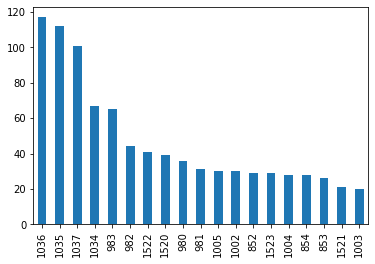

In [100]:
#Grafico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

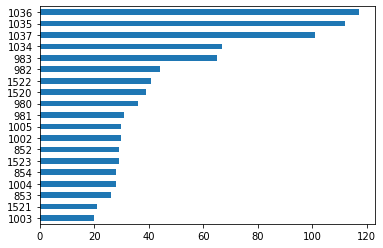

In [101]:
#Grafico de barras horizontais = plot.barh()
df['LojaID'].value_counts(ascending=True).plot.barh(); #o ; tira linha que é apresentada como cabeçalho 

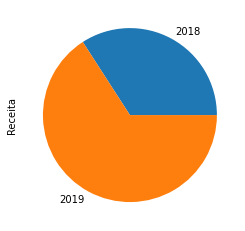

In [103]:
#Grafico de pizza - Receita Anual 
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

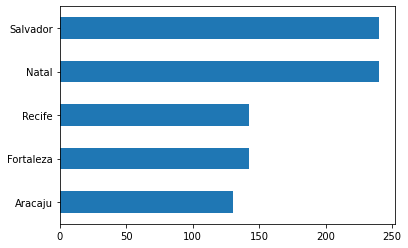

In [107]:
#Total de vendas por cidade
df['Cidade'].value_counts(ascending=True).plot.barh();

Text(0, 0.5, 'Total Vendas')

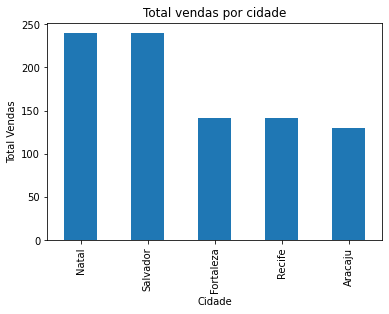

In [110]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total de vendas')

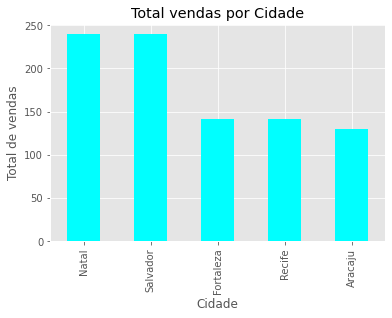

In [115]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='cyan')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas')


In [112]:
#Alterando o estilo
plt.style.use('ggplot')

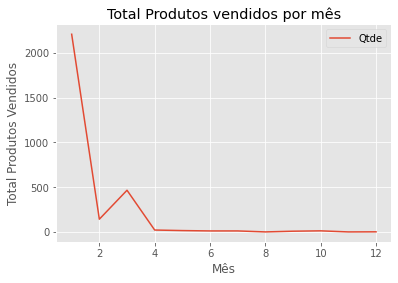

In [121]:
#criando grafico de linhas = .plot()
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [122]:
#produtos vendidos por mês
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [125]:
#selecionando vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

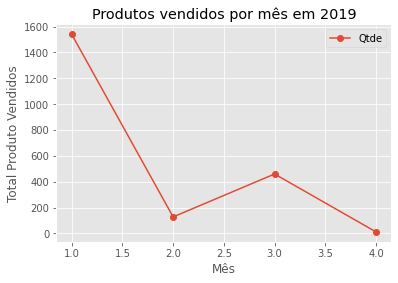

In [131]:
#total produtos vendidos por mês em 2019
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o', title = 'Produtos vendidos por mês em 2019')
plt.xlabel('Mês')
plt.ylabel('Total Produto Vendidos')
plt.legend();

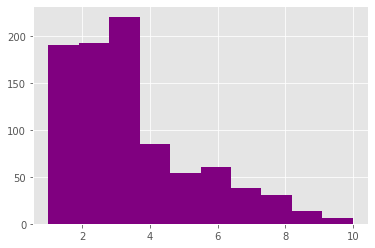

In [133]:
#grafico de histograma .hist
plt.hist(df['Qtde'], color = 'purple');

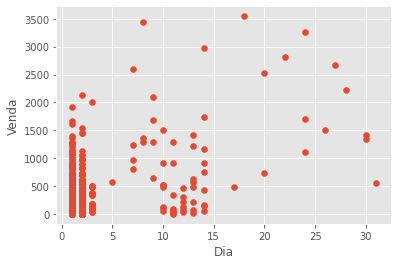

In [139]:
#grafico de dispersão
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);
plt.xlabel('Dia')
plt.ylabel('Venda');
plt.savefig('grafico Venda x Dia.png')


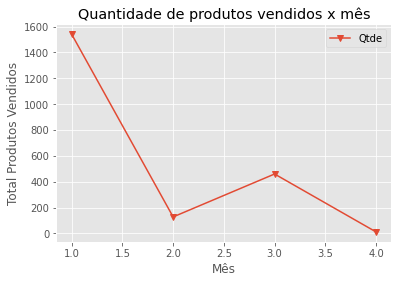

In [138]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('grafico QTDE x Mes.png')